# 1. 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액
- 국가통계포털 : https://kosis.kr/statHtml/statHtml.do?orgId=101&tblId=DT_1KE10081&vw_cd=MT_ZTITLE&list_id=JF&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE
- 관련기사 : http://world.kbs.co.kr/service/news_view.htm?lang=k&Seq_Code=346701
    - 지난해 연간 온라인 쇼핑 판매액이 18% 증가함
    - 이 분석을 한 뒤에, 구매액도 분석해 보면 좋을 거 같음

# 핵심 키워드
- KOSIS(국가통계포털)
- KOSIS > 국내통계 > 주제별통계
- 도소매서비스 > 온라인쇼핑동향조사 > 국가(대륙)별/상품군별 온라인쇼핑 해외직접판매액 > 분기를 선택하고 조회 > CSV 형태로 다운

## 1.1 (가설) K-Beautiy는 성장하고 있을까? 해외 직접판매를 한다면 어느 국가로 어떤 판매전략을 세우면 좋을까?
- e : 추정치, p : 잠정치, - : 자료없음, ... : 미상자료, x : 비밀보호, ▽ : 시계열 불연 (단위 : 백만원)

## 핵심 키워드
- pandas, seaborn, matplotlib
- pd.read_csv()

# 2. 필요 라이브러리 가져오기

In [23]:
# 라이브러리 로드
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# 시각화를 위한 폰트 설정
import os

os.name
if os.name == "posix":
    sns.set(font="AppleGothic")
else:  # Windows는 "nt"
    sns.set(font="Malgun Gothic")

In [3]:
# 레티나 설정을 해주면 글씨가 좀 더 선명하게 보임
# 폰트의 주변이 흐릿하게 보이는 것을 방지
%config InlineBackend.figure_fonrmat = 'retina'

# 3. 데이터 로드하기

In [4]:
df_raw = pd.read_csv(
    "./data/국가_대륙_별_상품군별_온라인쇼핑_해외직접판매액_20221121180507.csv", encoding="cp949")
df_raw.shape

(450, 27)

In [5]:
# "국가(대륙)별" 데이터 빈도수 세기
df_raw["국가(대륙)별"].value_counts()

합계            45
미국            45
중국            45
일본            45
아세안(ASEAN)    45
유럽연합(EU)      45
중동            45
중남미           45
대양주           45
기타            45
Name: 국가(대륙)별, dtype: int64

In [6]:
# 미국 데이터만 따로 보기
df_raw[df_raw["국가(대륙)별"] == "미국"].head()

,국가(대륙)별,상품군별,판매유형별,2014.1/4,2014.2/4,2014.3/4,2014.4/4,2015.1/4,2015.2/4,2015.3/4,...,2017.3/4,2017.4/4,2018.1/4,2018.2/4,2018.3/4,2018.4/4,2019.1/4,2019.2/4,2019.3/4,2019.4/4
45,미국,합계,계,25773,22573,21288,26729,39945,26654,28647,...,41927,53209,42679,40207,37631,48978,40985,44973,55512,54054
46,미국,합계,면세점,-,-,-,-,-,-,-,...,9469,12177,5184,3603,2317,2079,2657,2951,1818,1481
47,미국,합계,면세점 이외,-,-,-,-,-,-,-,...,32458,41032,37495,36604,35314,46899,38328,42022,53694,52573
48,미국,컴퓨터 및 주변기기,계,2216,1666,1776,1675,1469,1393,2166,...,791,854,2033,1553,1784,1774,1298,1408,1653,1383
49,미국,컴퓨터 및 주변기기,면세점,-,-,-,-,-,-,-,...,0,0,0,0,0,1,0,0,0,0


# 4. 분석과 시각화를 위한 tidy data 만들기
- https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf
- melt 함수로 tidy data 만들기

# 핵심 키워드
- tidy data
- df.melt()

In [7]:
df_raw.columns

Index(['국가(대륙)별', '상품군별', '판매유형별', '2014.1/4', '2014.2/4', '2014.3/4',
       '2014.4/4', '2015.1/4', '2015.2/4', '2015.3/4', '2015.4/4', '2016.1/4',
       '2016.2/4', '2016.3/4', '2016.4/4', '2017.1/4', '2017.2/4', '2017.3/4',
       '2017.4/4', '2018.1/4', '2018.2/4', '2018.3/4', '2018.4/4', '2019.1/4',
       '2019.2/4', '2019.3/4', '2019.4/4'],
      dtype='object')

In [8]:
df_raw.values

array([['합계', '합계', '계', ..., 1345723, 1526135, 1881628],
       ['합계', '합계', '면세점', ..., 1157158, 1336372, 1655635],
       ['합계', '합계', '면세점 이외', ..., 188565, 189763, 225993],
       ...,
       ['기타', '기 타', '계', ..., 689, 469, 1094],
       ['기타', '기 타', '면세점', ..., 1, 0, 1],
       ['기타', '기 타', '면세점 이외', ..., 688, 469, 1093]], dtype=object)

In [9]:
# df_raw.melt?
# 분기별 데이터를 행으로 만들기
# variable : 나머지 column 값들이 모두 행으로 내려옴
# var_name : column 이름 지정
df = df_raw.melt(id_vars=["국가(대륙)별", "상품군별", "판매유형별"], var_name="기간", value_name="백만원")
df.shape

(10800, 5)

In [10]:
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원
0,합계,합계,계,2014.1/4,148272
1,합계,합계,면세점,2014.1/4,-
2,합계,합계,면세점 이외,2014.1/4,-
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   국가(대륙)별  10800 non-null  object
 1   상품군별     10800 non-null  object
 2   판매유형별    10800 non-null  object
 3   기간       10800 non-null  object
 4   백만원      10800 non-null  object
dtypes: object(5)
memory usage: 422.0+ KB


# 5. 데이터 전처리
- 문자열을 분리하여 다른 열에 저장하는 방법 알아보기
- 기존의 데이터 값을 다른 데이터로 대체하는 법, 데이터의 타입을 변경하는 법 알아보기
- 불필요한 데이터를 제거하는 법 알아보기

# 핵심 키워드
- split, map(), lambda 함수
- replace, astype()

## 5.1 기간에서 연도를 분리하기

In [12]:
# split() : 공백으로 분리
df["연도"] = df["기간"].map(lambda x: int(x.split(".")[0]))  # "."으로 분리
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도
0,합계,합계,계,2014.1/4,148272,2014
1,합계,합계,면세점,2014.1/4,-,2014
2,합계,합계,면세점 이외,2014.1/4,-,2014
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014


In [13]:
# 기간에서 분기만 분리하기
df["기간"].map(lambda x: int(x.split(".")[1].split("/")[0]))

0        1
1        1
2        1
3        1
4        1
        ..
10795    4
10796    4
10797    4
10798    4
10799    4
Name: 기간, Length: 10800, dtype: int64

In [14]:
# 분기 컬럼 만들기
df["분기"] = df["기간"].map(lambda x: int(x.split(".")[1].split("/")[0]))
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272,2014,1
1,합계,합계,면세점,2014.1/4,-,2014,1
2,합계,합계,면세점 이외,2014.1/4,-,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,-,2014,1


## 5.2 금액을 수치데이터로 표현하기 위해 데이터 타입 변경하기

In [25]:
# - 문자를 결측치로 변경하고 float 타입으로 변경하기
df["백만원"] = df["백만원"].replace("-", np.nan).astype(float)
df.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
0,합계,합계,계,2014.1/4,148272.0,2014,1
1,합계,합계,면세점,2014.1/4,NaN,2014,1
2,합계,합계,면세점 이외,2014.1/4,NaN,2014,1
3,합계,컴퓨터 및 주변기기,계,2014.1/4,4915.0,2014,1
4,합계,컴퓨터 및 주변기기,면세점,2014.1/4,NaN,2014,1


## 5.3 필요없는 데이터 제거하기

In [30]:
df.info()  # 메모리 590KB 사용

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10800 entries, 0 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  10800 non-null  object 
 1   상품군별     10800 non-null  object 
 2   판매유형별    10800 non-null  object 
 3   기간       10800 non-null  object 
 4   백만원      7200 non-null   float64
 5   연도       10800 non-null  int64  
 6   분기       10800 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 590.8+ KB


In [31]:
# 합계 데이터는 따로 구할 수 있기 때문에 전체 데이터에서 제거
df = df[(df["국가(대륙)별"] != "합계") & (df["상품군별"] != "합계")].copy()
df.info()  # 메모리 567KB 사용

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9072 entries, 48 to 10799
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   국가(대륙)별  9072 non-null   object 
 1   상품군별     9072 non-null   object 
 2   판매유형별    9072 non-null   object 
 3   기간       9072 non-null   object 
 4   백만원      6048 non-null   float64
 5   연도       9072 non-null   int64  
 6   분기       9072 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 567.0+ KB


In [33]:
# 결측치 보기
# 금액이 없는 데이터도 있음
df.isnull().sum()

국가(대륙)별       0
상품군별          0
판매유형별         0
기간            0
백만원        3024
연도            0
분기            0
dtype: int64

# 6. K-Beauty 시각화

# 핵심 키워드
- sns.lineplot() / sns.relplot() -> lineplot()을 subplot으로 그릴 수 있는 기능
- plt.legend()

## 6.1 전체 상품군 판매액

In [37]:
# 판매유형별 데이터는 일부 기간에는 "계"만 존재하기 때문에
# 판매유형별 == "계" 데이터만 가져와서 봐야지
# 평균 값을 구하는 그래프에서 올바른 값을 표현할 수 있음
df_total = df[df["판매유형별"] == "계"].copy()
df_total.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
48,미국,컴퓨터 및 주변기기,계,2014.1/4,2216.0,2014,1
51,미국,가전·전자·통신기기,계,2014.1/4,2875.0,2014,1
54,미국,소프트웨어,계,2014.1/4,47.0,2014,1
57,미국,서 적,계,2014.1/4,962.0,2014,1
60,미국,사무·문구,계,2014.1/4,25.0,2014,1


<AxesSubplot:xlabel='연도', ylabel='백만원'>

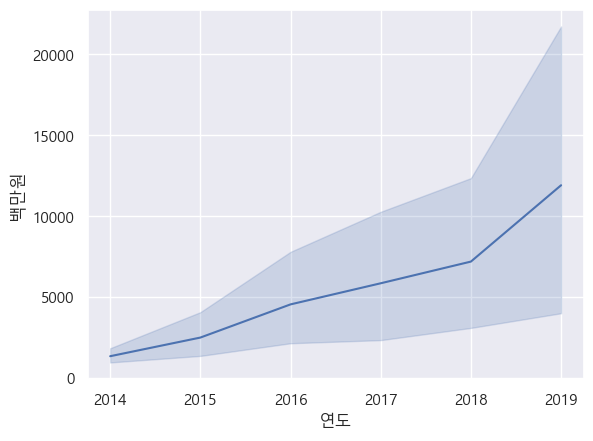

In [39]:
# 연도, 판매액 lineplot으로 그리기
# 판매액이 2014년부터 2019년까지 계속 증가하고 있음
sns.lineplot(data=df_total, x="연도", y="백만원")

- legend를 그래프의 밖에 그리기 : https://stackoverflow.com/questions/30490740/move-legend-outside-figure-in-seaborn-tsplot

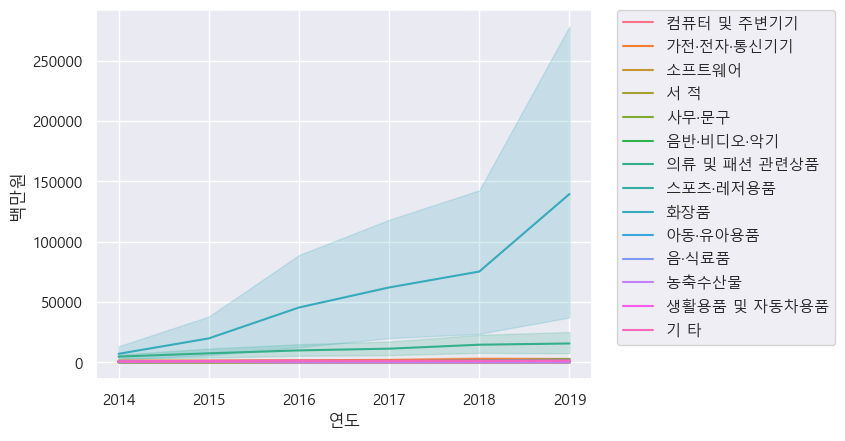

In [42]:
# 연도, 판매액을 lineplot으로 그리고 상품군별로 다른 색상으로 표시하기
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

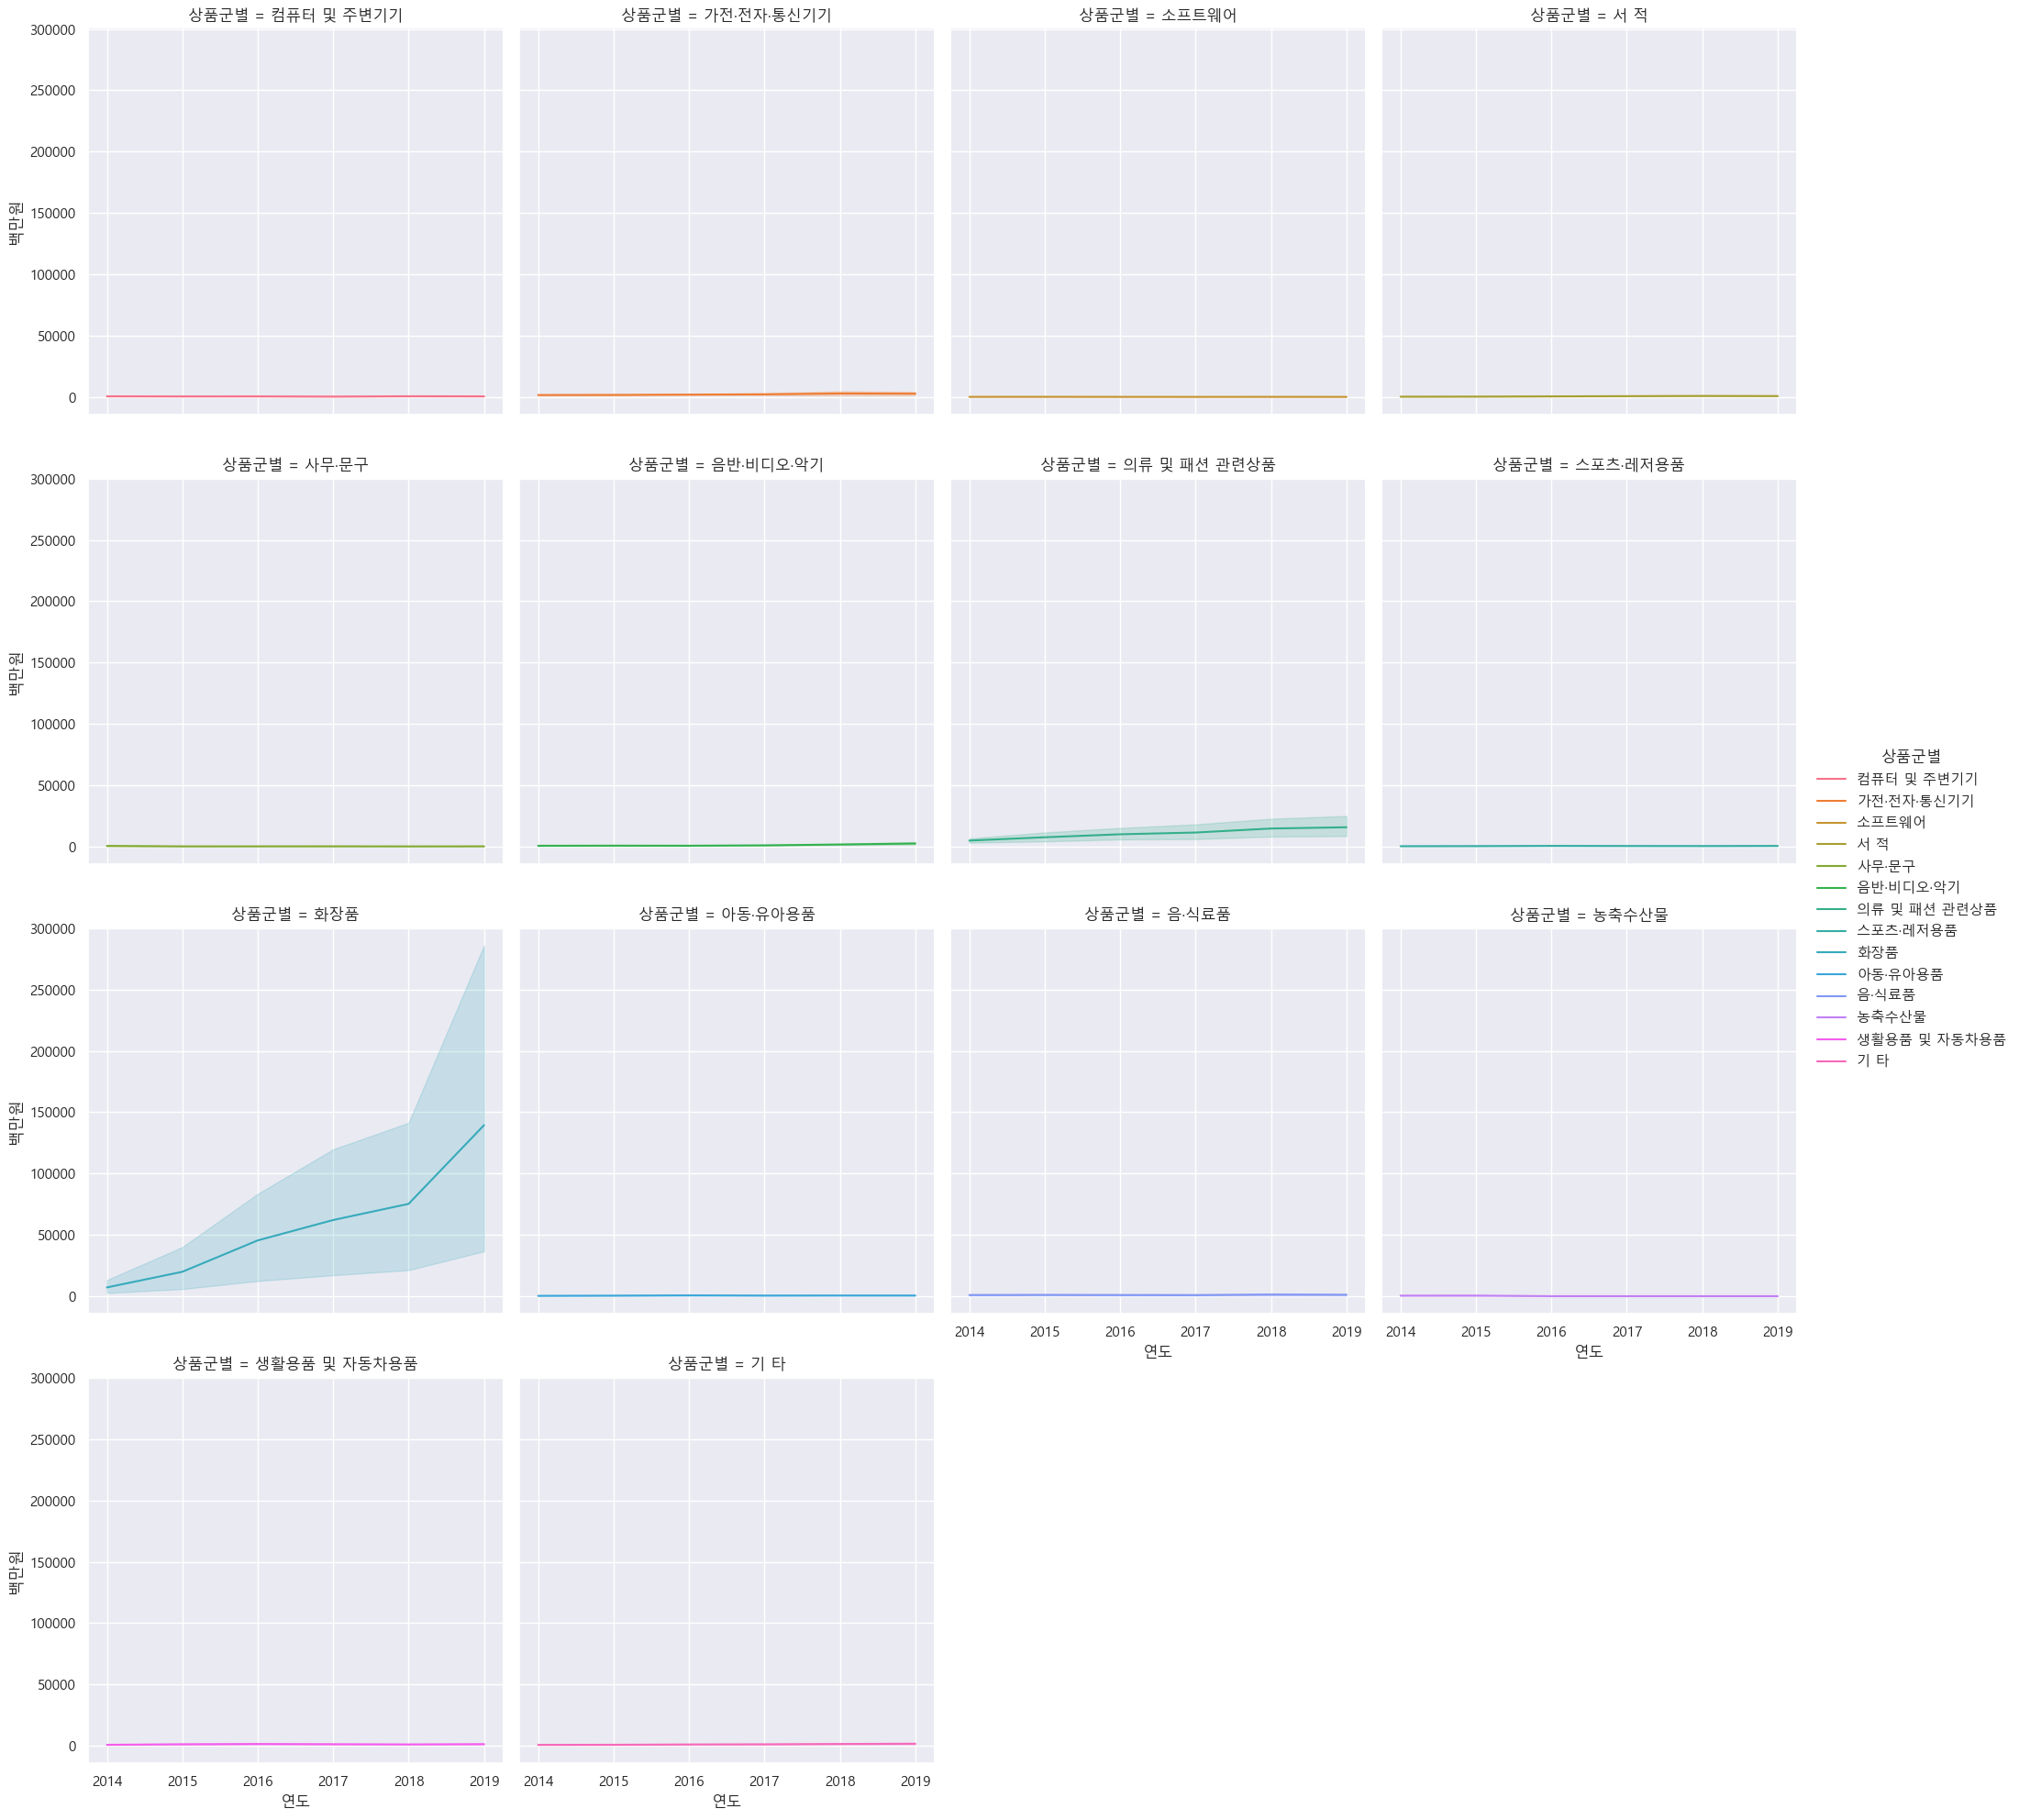

In [52]:
# 위에 그린 그래프를 자세히 보기 위해 서브플롯으로 표시하기
# col_wrap : 한 줄에 몇 개의 subplot을 표현할지 지정
# 화장품 값이 커서, 다른 값들을 제대로 보기가 어려움
sns.relplot(
    data=df_total, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4
)

In [67]:
# isin을 사용해 화장품만 제외하고 df_sub라는 변수에 담기
df_sub = df_total[~df_total["상품군별"].isin(["화장품", "의류 및 패션 관련상품"])].copy()

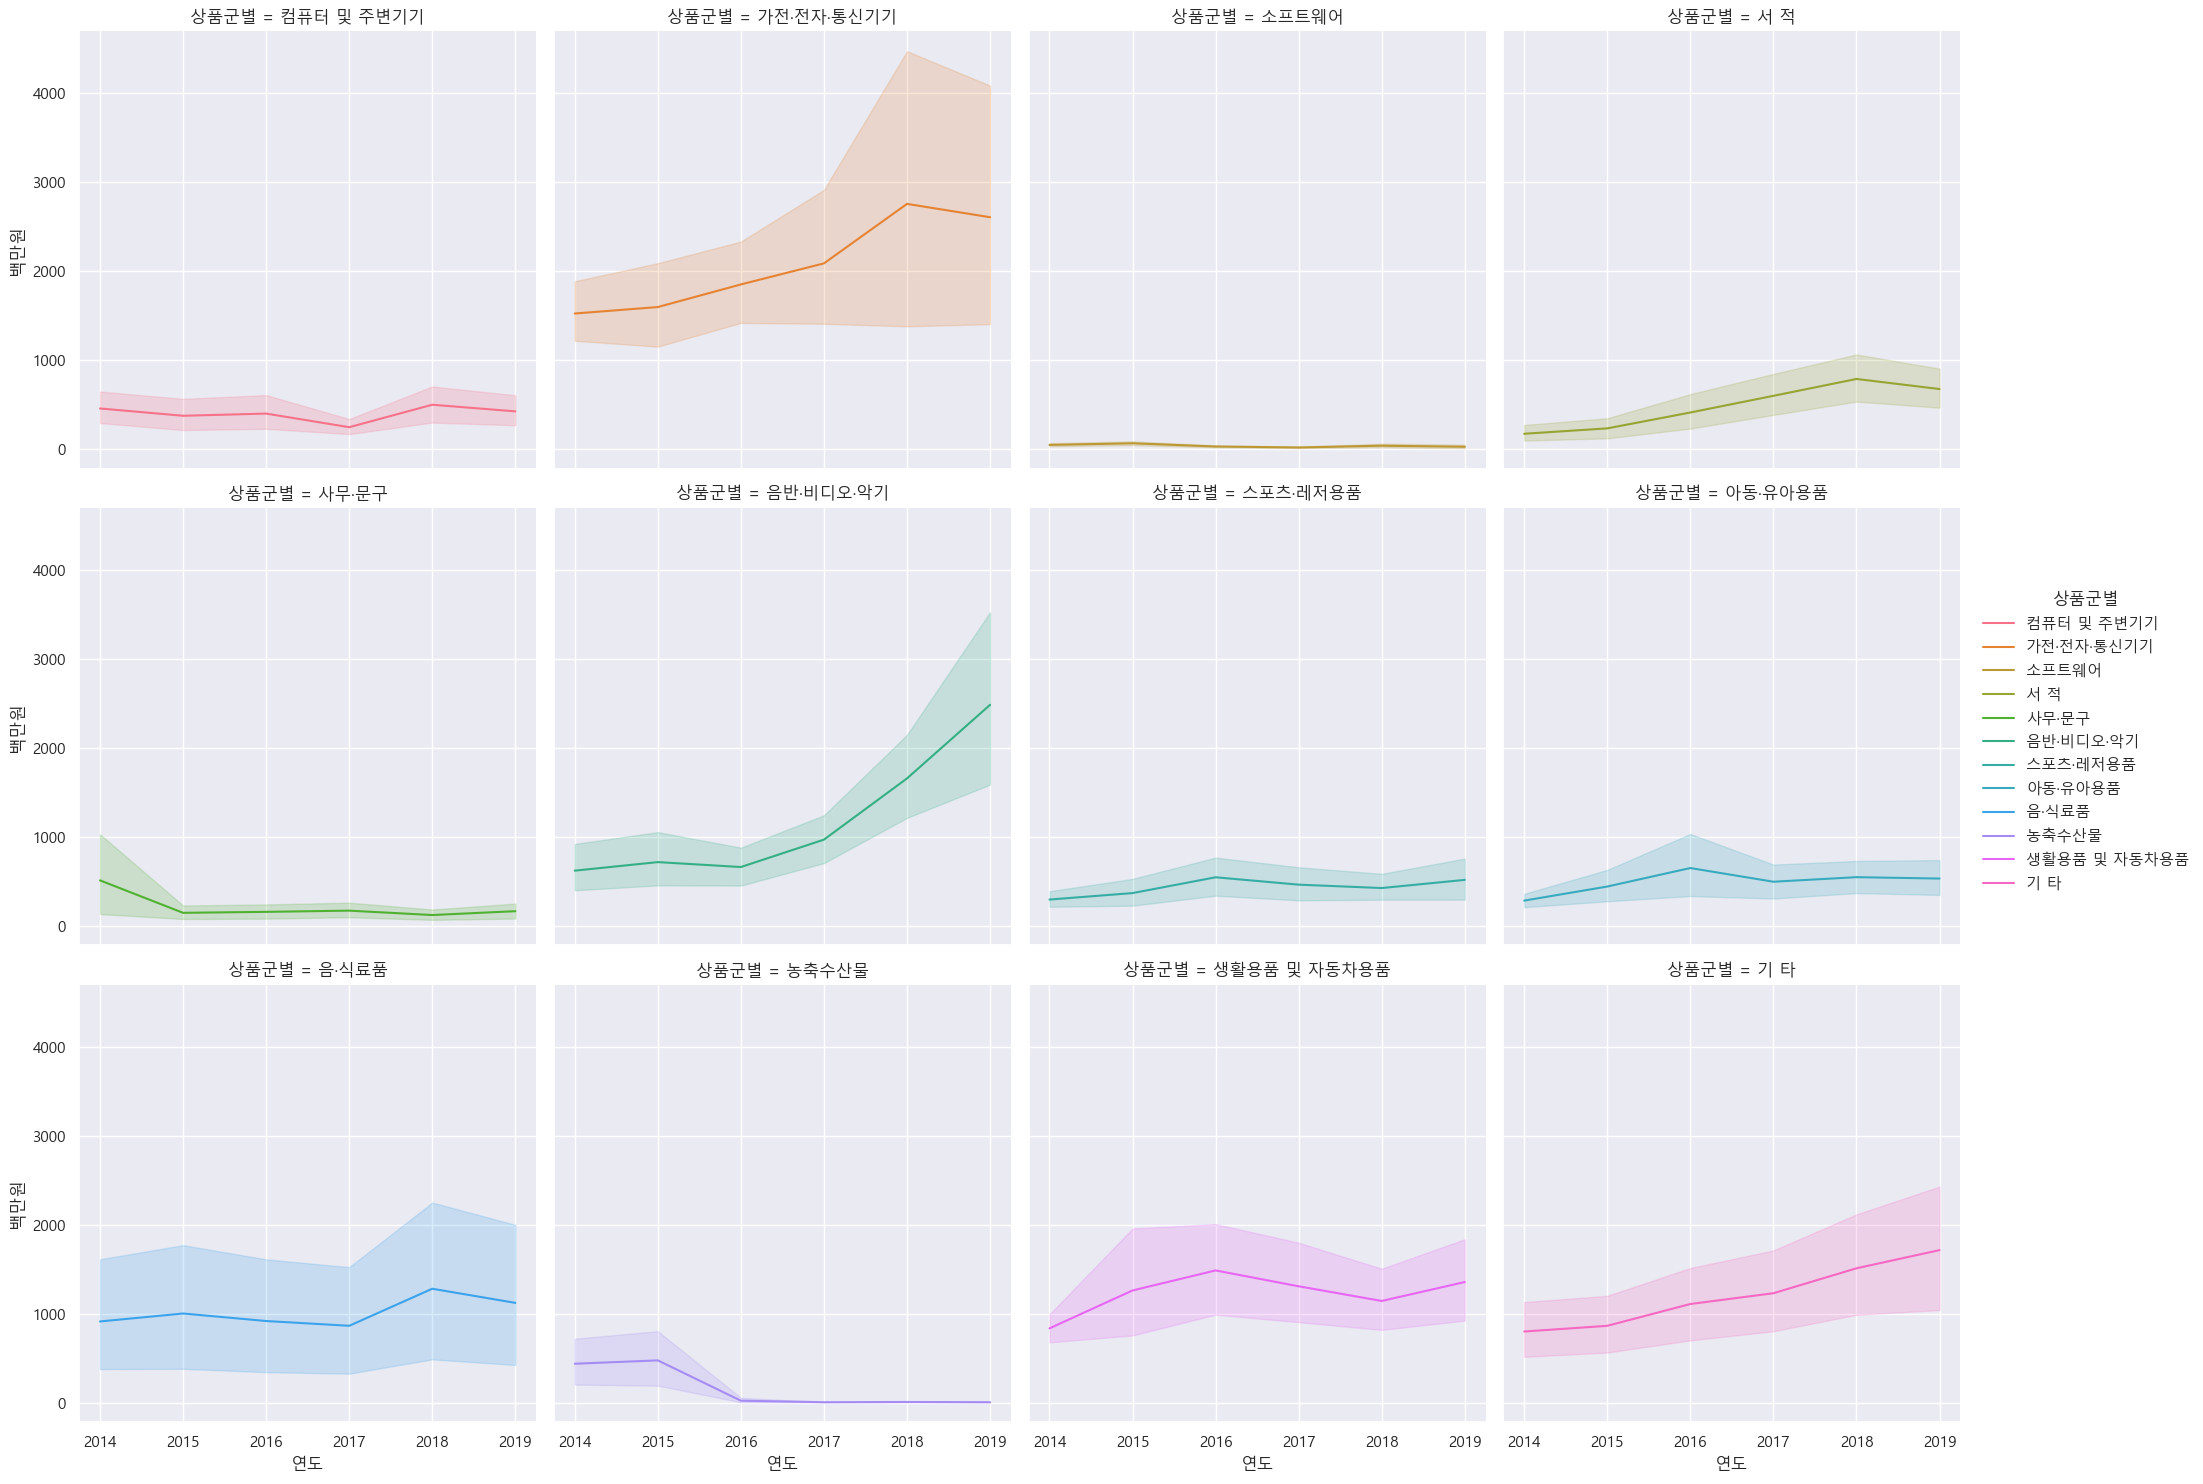

In [68]:
# 연도별 판매액을 상품군별로 relplot을 활용해 서브플롯으로 그리기
# 가전 전자 통신 기기, 음반 비디오 악기, 기타, 서적도 증가하고 있음
sns.relplot(data=df_sub, x="연도", y="백만원", hue="상품군별", kind="line", col="상품군별", col_wrap=4)

## 6.2 화장품의 온라인쇼핑 해외 직접판매액

## 핵심 키워드
- sns.lineplot()
- plt.figure(), plt.xticks()

In [73]:
# df_cosmetic이라는 변수에 상품군별이 화장품인 데이터만 가져오기
df_cosmetic = df_total[df_total["상품군별"] == "화장품"].copy()
df_cosmetic["상품군별"].unique()

array(['화장품'], dtype=object)

<AxesSubplot:xlabel='연도', ylabel='백만원'>

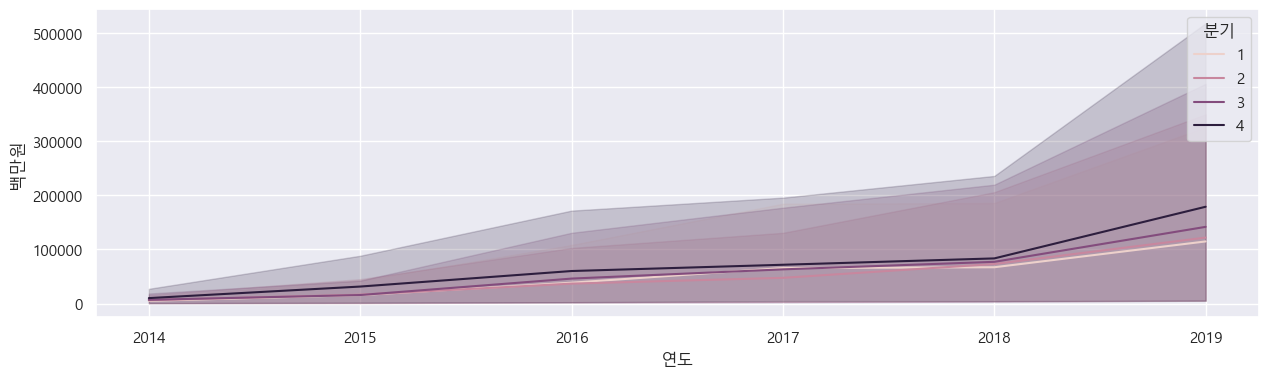

In [75]:
# 연도와 판매액을 lineplot으로 그리고 분기별로 다른 색상으로 표현하기
# 2014년부터 2019년까지 성장하고 있고, 1분기 보다 4분기로 갈수록 판매량이 증가
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_cosmetic, x="연도", y="백만원", hue="분기")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

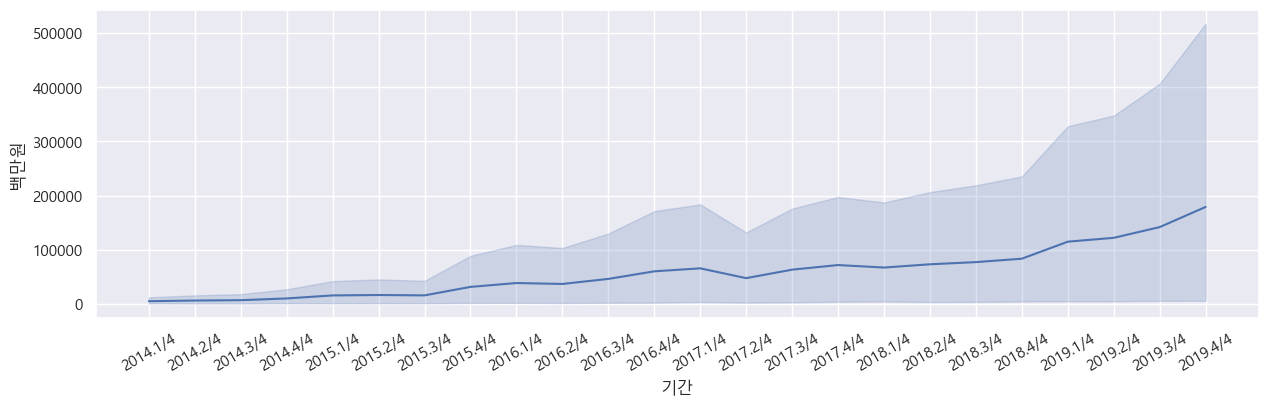

In [78]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화 하기
# 화장품 판매액은 꾸준히 증가함
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)  # x축 글씨 기울기 조정
sns.lineplot(data=df_cosmetic, x="기간", y="백만원")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

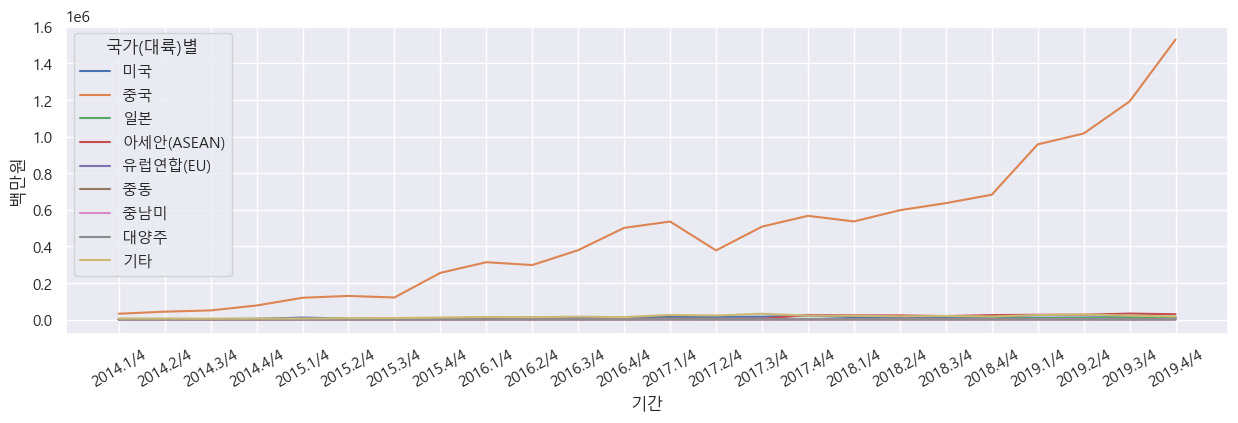

In [79]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "국가(대륙)별"로 다른 색상으로 표시하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)  # x축 글씨 기울기 조정
sns.lineplot(data=df_cosmetic, x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

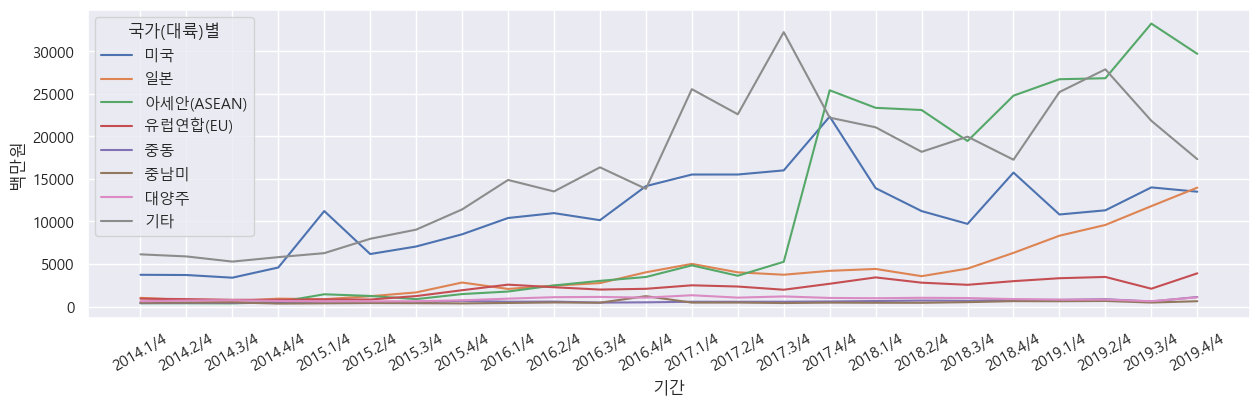

In [80]:
# 중국을 제외하기
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)  # x축 글씨 기울기 조정
sns.lineplot(data=df_cosmetic[df_cosmetic["국가(대륙)별"] != "중국"], x="기간", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='기간', ylabel='백만원'>

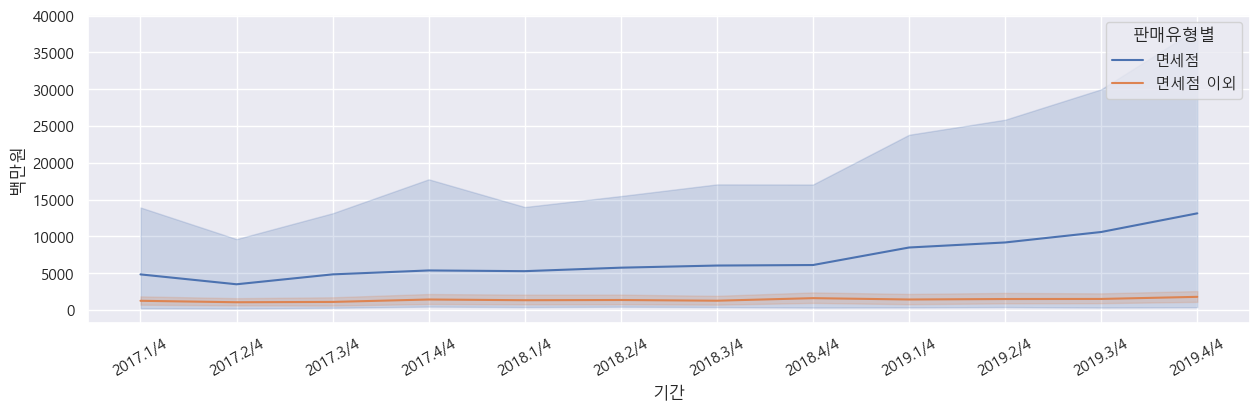

In [85]:
# 화장품 판매액에 대한 기간별 금액 데이터 시각화하고 "판매유형별"로 다른 색상으로 표시하rl
# 2017년부터 데이터가 존재
# 면세점 : 온라인을 의미
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)  # x축 글씨 기울기 조정
df_sub = df[df["판매유형별"] != "계"].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별")

c:\Users\user\Anaconda3\envs\AI_exam\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


<AxesSubplot:xlabel='기간', ylabel='백만원'>

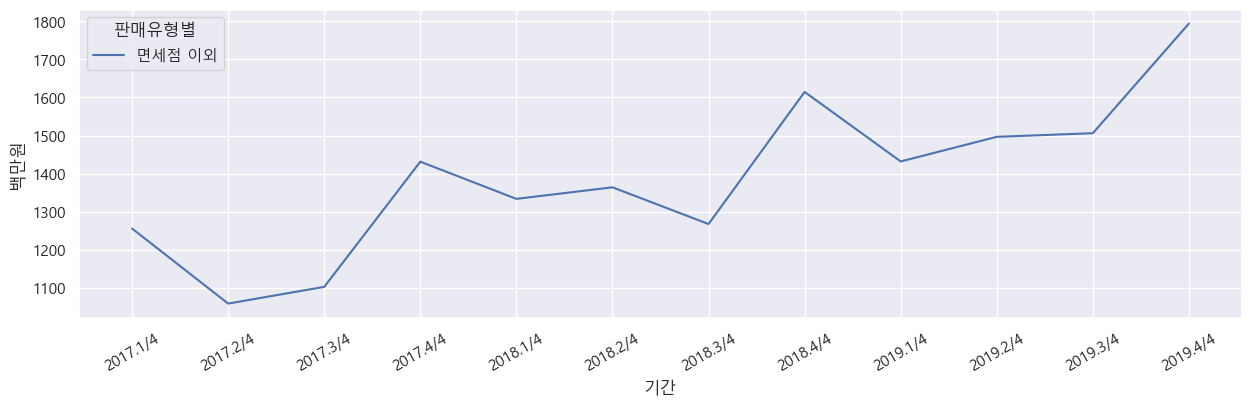

In [91]:
# 면세점을 제외하고 보기
# 전체적으로는 증가함
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)  # x축 글씨 기울기 조정
df_sub = df[(df["판매유형별"] != "계") & (df["판매유형별"] != "면세점")].copy()
sns.lineplot(data=df_sub, x="기간", y="백만원", hue="판매유형별", ci=None)

## 6.3 의류 및 패션관련 상품 온라인 쇼핑 해외직접판매액

## 핵심 키워드
- sns.lineplot()
- plt.figure(), plt.xticks()

In [102]:
# df_fashion 변수에 의류 데이터만 가져와 따로 담기
df_fashion = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] == "계")].copy()
df_fashion.head()

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1
156,일본,의류 및 패션 관련상품,계,2014.1/4,13534.0,2014,1
201,아세안(ASEAN),의류 및 패션 관련상품,계,2014.1/4,3473.0,2014,1
246,유럽연합(EU),의류 및 패션 관련상품,계,2014.1/4,1364.0,2014,1


<AxesSubplot:xlabel='기간', ylabel='백만원'>

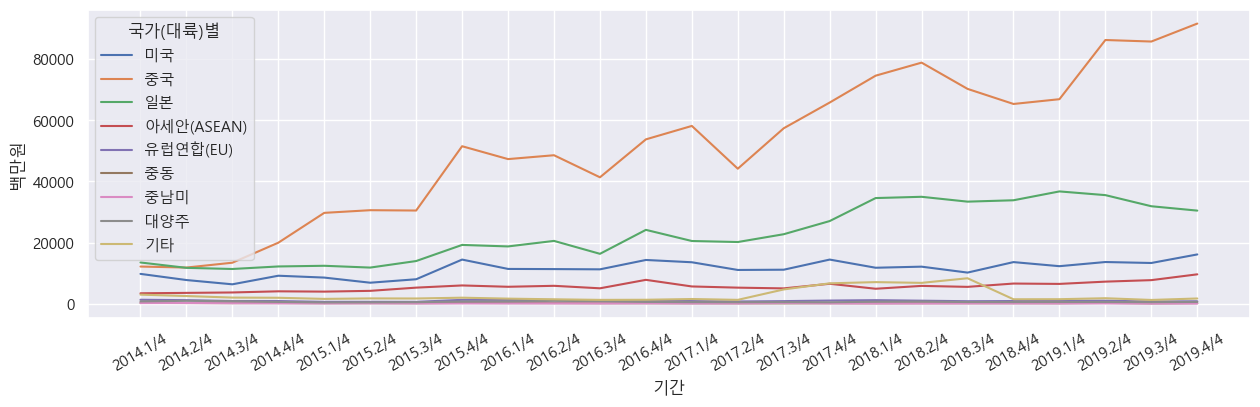

In [98]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "국가(대륙)별"로 다른 색상으로 표시하기
# 판매량이 계속 증가함
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion, x="기간", y="백만원", hue="국가(대륙)별")

c:\Users\user\Anaconda3\envs\AI_exam\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  


<AxesSubplot:xlabel='기간', ylabel='백만원'>

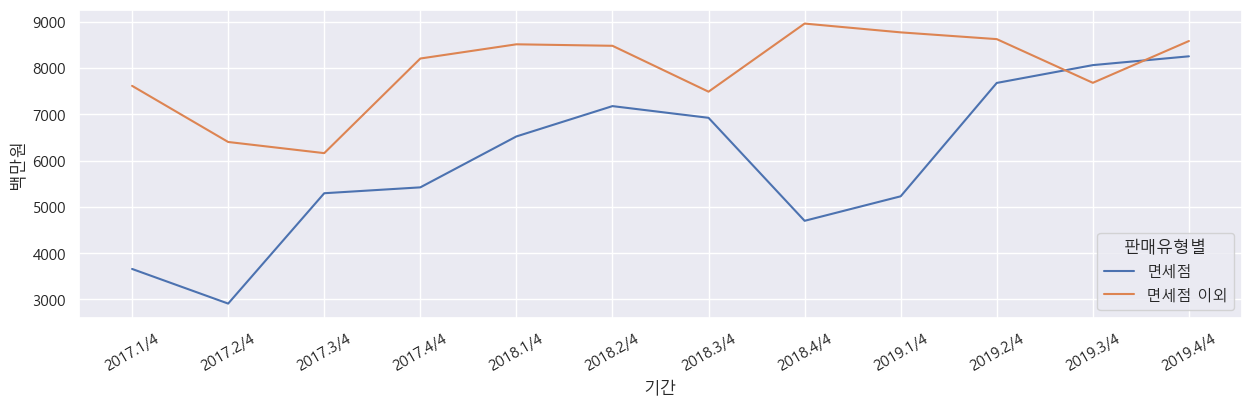

In [104]:
# "의류 및 패션관련 상품" 판매액에 대한 기간별 금액 데이터 시각화하고
# "판매유형별"로 다른 색상으로 표시하기
df_fashion2 = df[(df["상품군별"] == "의류 및 패션 관련상품") & (df["판매유형별"] != "계")].copy()
plt.figure(figsize=(15, 4))
plt.xticks(rotation=30)
sns.lineplot(data=df_fashion2, x="기간", y="백만원", hue="판매유형별", ci=None)

## 6.4 데이터 집계하기

## 핵심 키워드
- df.pivot_table()
- sns.heatmap()

In [113]:
df_fashion.head(2)

,국가(대륙)별,상품군별,판매유형별,기간,백만원,연도,분기
66,미국,의류 및 패션 관련상품,계,2014.1/4,9810.0,2014,1
111,중국,의류 및 패션 관련상품,계,2014.1/4,12206.0,2014,1


In [112]:
# 카테고리 값에 중복된 값이 없는지 확인
df_fashion["판매유형별"].value_counts()

계    216
Name: 판매유형별, dtype: int64

In [114]:
# 피봇테이블로 "국가(대륙)별", "연도"별 합계 금액을 표 형태로 구하기
# df_fashion.pivot_table?
result = df_fashion.pivot_table(
    index="국가(대륙)별", columns="연도", values="백만원", aggfunc="sum"
)
result

연도,2014,2015,2016,2017,2018,2019
국가(대륙)별,,,,,,
기타,9683.0,7248.0,5918.0,14387.0,23901.0,6475.0
대양주,3392.0,2349.0,3401.0,2266.0,2725.0,2489.0
미국,33223.0,38066.0,48451.0,50353.0,47875.0,55536.0
아세안(ASEAN),14936.0,19639.0,24478.0,22671.0,23068.0,31247.0
유럽연합(EU),4485.0,3374.0,4899.0,3736.0,4114.0,3694.0
일본,48960.0,57594.0,79905.0,90584.0,136800.0,134637.0
중국,57531.0,142339.0,190932.0,225407.0,288848.0,330267.0
중남미,975.0,616.0,649.0,762.0,576.0,544.0
중동,1172.0,1018.0,968.0,772.0,879.0,951.0


## 6.5 연산결과를 시각적으로 보기

<AxesSubplot:xlabel='연도', ylabel='국가(대륙)별'>

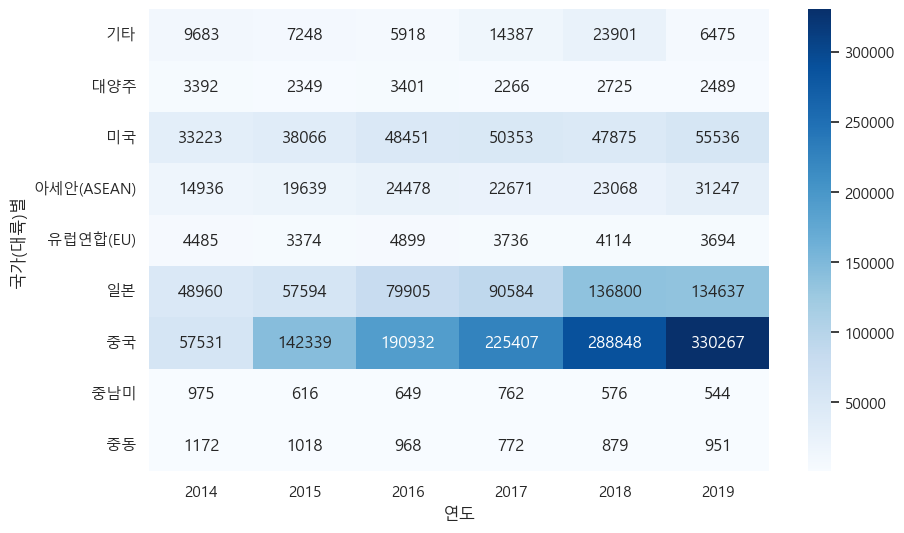

In [121]:
# 피봇테이블로 구한 결과를 값의 많고 적음에 따라 시각적으로 표현하기
# cmap="Blues_r" : 값이 많을수록 흐리게
# annot=True : 숫자 명시
# fmt=".0f" : 숫자 format, 소수점없는 folat 형태
# 중국의 구매액이 가장 많고, 2019년으로 갈수록 온라인 판매액이 증가함
# 일본, 미국도 꽤 많이 증가하고 있는 추세
plt.figure(figsize=(10, 6))
sns.heatmap(result, cmap="Blues", annot=True, fmt=".0f")  # 값이 많을수록 진하게

# 7. 전체 상품군별로 온라인쇼핑 해외 직접판매액은 증가했을까?

# 핵심 키워드
- sns.barplot()
- sns.lineplot()
- plt.legend()

<AxesSubplot:xlabel='연도', ylabel='백만원'>

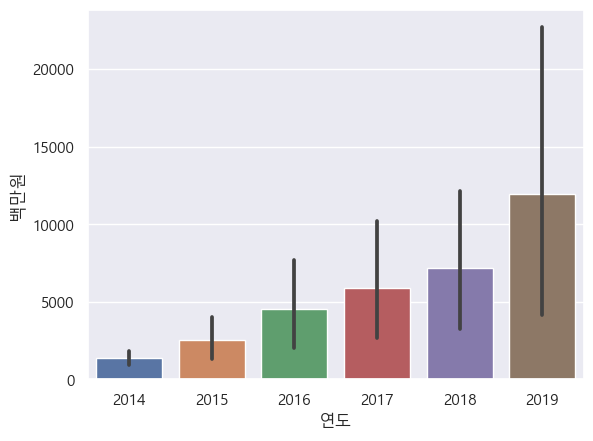

In [125]:
# 위에서 판매유형별 데이터의 "계"만 모은 df_total 변수를 통한 연도별 합계 금액을 시각화하기
# 평균적으로 2014년부터 2019년까지 온라인 해외 직접판매액은 증가함
sns.barplot(data=df_total, x="연도", y="백만원")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

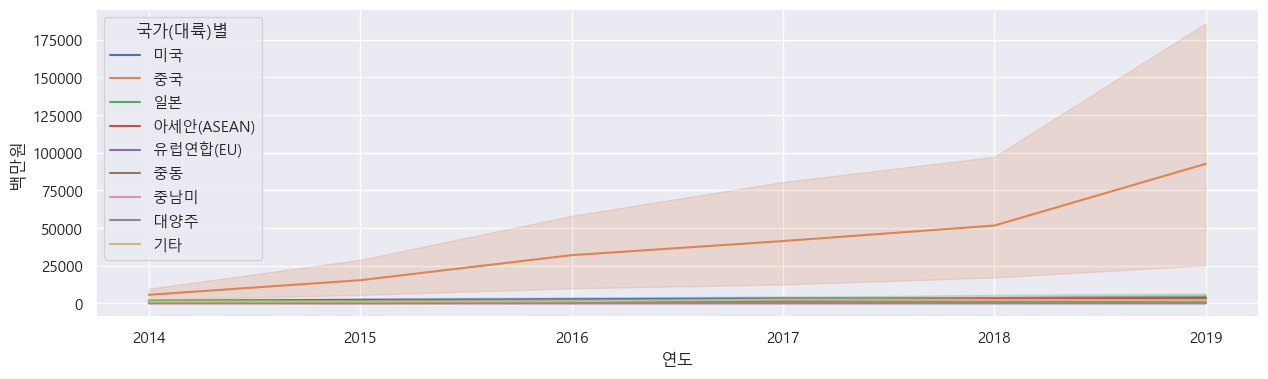

In [128]:
# 연도별 판매액을 그리고 "국가(대륙)별"로 다른 색상으로 표현하기
# 꾸준히 증가하고 있음
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="국가(대륙)별")

<AxesSubplot:xlabel='연도', ylabel='백만원'>

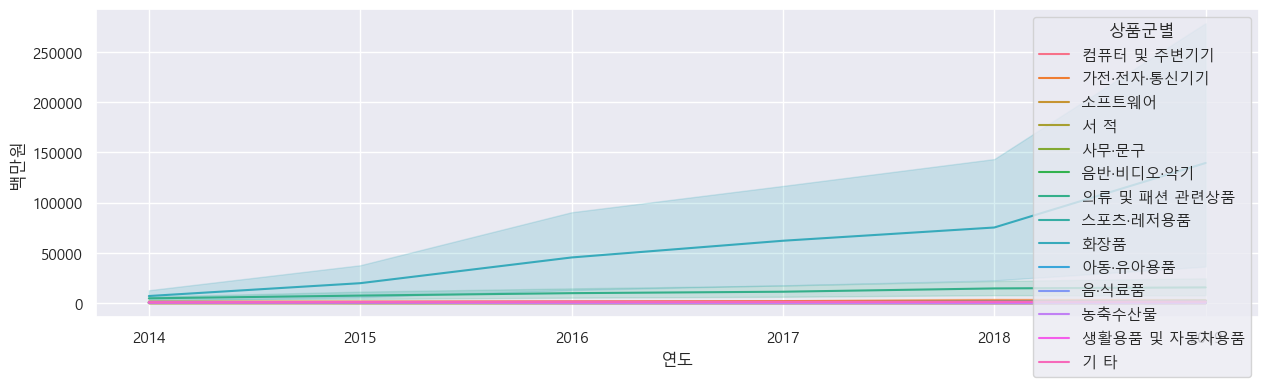

In [129]:
# 연도별 판매액을 그리고 "상품군별"로 다른 색상으로 표현하기
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")

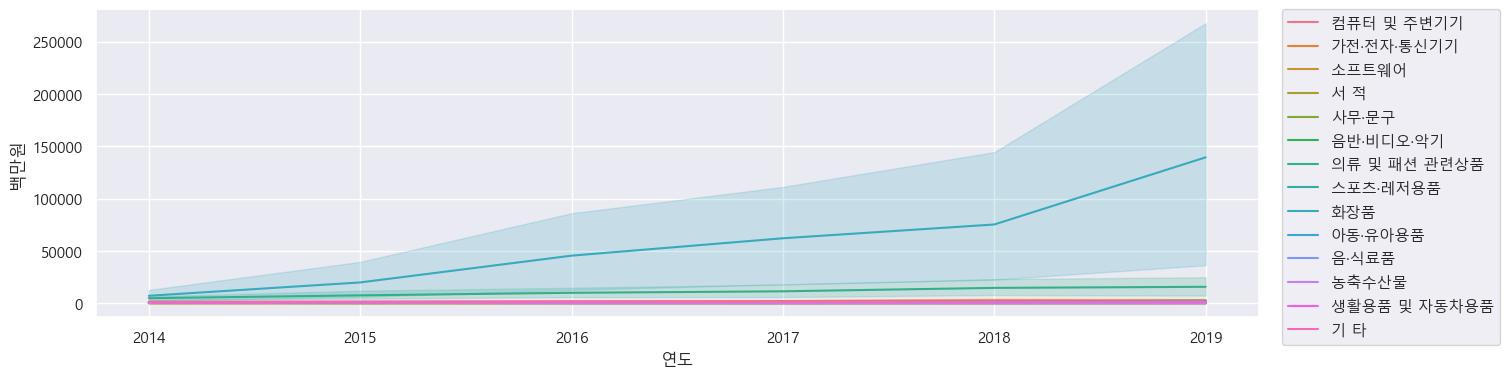

In [131]:
# legend를 그래프의 밖에 그리기
# 화장품이 가장 많이 판매됨
plt.figure(figsize=(15, 4))
sns.lineplot(data=df_total, x="연도", y="백만원", hue="상품군별")
plt.legend(bbox_to_anchor=(1.02, 1), loc=2, borderaxespad=0.)